## 2. 카메라 스티커앱 만들기




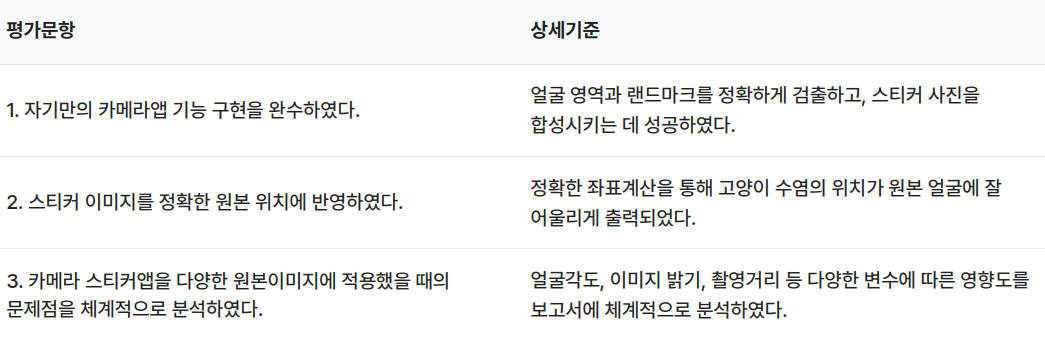


- 라이브러리 버전 확인

In [1]:
import cv2
import dlib

print(cv2.__version__)
print(dlib.__version__)

4.5.3
19.22.1


- 필요한 라이브러리 패키지 import 하기


### Step 1. 스티커 구하기 or 만들기

- https://www.flaticon.com/free-icon/cat-whiskers_24674?term=cat%20nose&page=1&position=1 공양이 수염 다운, 쥬피터 업로드


- 대상 모델 준비 , 쥬피터 업로드

In [2]:
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # 컴퓨터 비전 
import matplotlib.pyplot as plt 
import numpy as np # 다차원 배열을 쉽게 처리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능
print("쓩")

쓩


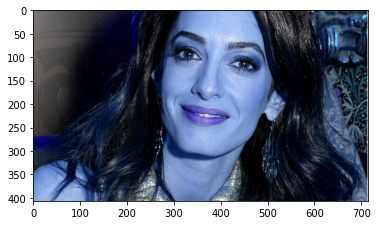

In [3]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/amal1.png' # 본인 이미지가 있는 경로를 가지고 옴.
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옴
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관
plt.imshow(img_bgr) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. 
plt.show() # 이미지 출력

- 얼굴 색이 푸른건 opencv는  특징. BGR(파랑, 녹색, 빨강)을 사용. 붉은색은 푸른색으로, 푸른색은 붉은색으로 바뀌어 출력되서.


- plt.imshow 이전에 RGB 이미지로 바꿈

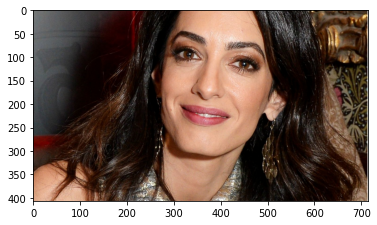

In [4]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림.)
plt.show() 

### Step 2. 얼굴 검출 & 랜드마크 검출 하기


- detector 선언

In [6]:
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환
print("쓩")

쓩


- detector_hog를 이용해서 얼굴의 bounding box를 추출

In [7]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("쓩")

쓩


- -https://opencv-python.readthedocs.io/en/latest/doc/14.imagePyramid/imagePyramid.html Image Pyramid의 종류 1) Gaussian Pyramids 와 2) Laplacian Pyramids
■ 1/4사이즈로 줄이는 코드 -> 커서 10%

2개의 이미지를 각각 Load함.
각 이미지에 대해서 적당한 Gaussian Pyramid를 생성함.
Gaussian Pyramid를 이용하여 Laplacian Pyramid를 생성함.
각 단계의 Laplicain Pyramid를 이용하여 각 이미지의 좌측과 우측을 결함.
결함한 결과중 가장 작은 이미지를 확대하면서 동일 사이즈의 결합결과와 Add하여 외곽선을 선명하게 처리함.
■ 위 작업단계 순서대로 2개의 이미지를 결함한 코드 -> 커서 50%





-  찾은 얼굴 영역 박스 리스트

rectangles[[(260, 23) (527, 290)]]


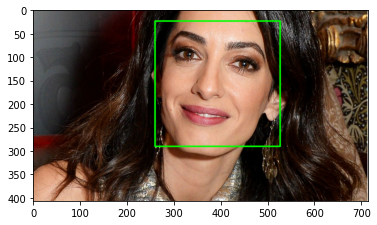

In [8]:
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_bgr, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림Q  시작점, 종료점 어디?

img_show_rgb =  cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

- Q. 이마 반이 영역 밖인데 위로 영역 더 넓히려면 ? (0,255,0), 2,에서 2는 뭐 ?



- https://deep-learning-study.tistory.com/105 40% cv2.rectangle(img, (70, 220), (180, 200), (0, 128, 0), -1) # 두께가-1은 내부 색 칠하기,색상 채우기

- 저장한 landmark 모델을 불러옴.

In [ ]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2

- !mv shape_predictor_68_face_landmarks.dat.bz2 ~/aiffel/camera_sticker/models # Q 왜 image는 아니고 models ? -> models안에 shape_predictor_68_face_landmarks.dat등 landmarks관련 2개 화일 있음. 



- 노드에서 실행됐는데 쥬피터에선 이런 에러남. mv: cannot stat 'shape_predictor_68_face_landmarks.dat.bz2': No such file or directory
  쥬피터에선  os.getenv('HOME')+'/aiffel 붙여 아래같은 절대경로로 landmarks 모델을 불러와야 하는듯 !
  

In [10]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
    # 저장한 landmark 모델의 주소를 model_path 변수에 저장
landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄
print("쓩") 

쓩


In [11]:
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성    

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list 
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 Index Error가 발생
print(list_landmarks)

68
[[(279, 97), (274, 126), (271, 155), (271, 186), (273, 217), (280, 247), (295, 275), (316, 298), (348, 308), (384, 311), (417, 302), (446, 287), (468, 265), (482, 237), (494, 206), (505, 175), (514, 143), (294, 61), (310, 48), (330, 47), (350, 53), (369, 67), (415, 75), (438, 69), (462, 69), (483, 80), (495, 100), (386, 101), (381, 124), (376, 146), (371, 168), (348, 178), (357, 185), (368, 193), (382, 189), (395, 187), (309, 93), (324, 86), (341, 90), (355, 105), (337, 105), (320, 102), (421, 117), (439, 106), (457, 108), (470, 121), (455, 125), (437, 122), (315, 207), (334, 203), (352, 204), (366, 209), (381, 209), (401, 216), (422, 229), (396, 243), (374, 246), (359, 244), (343, 239), (327, 229), (324, 211), (350, 219), (365, 222), (379, 225), (413, 229), (377, 230), (362, 228), (348, 223)]]


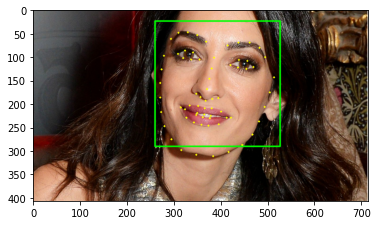

In [13]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_bgr, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()   

### Step 3. 스티커 적용 위치 확인하기

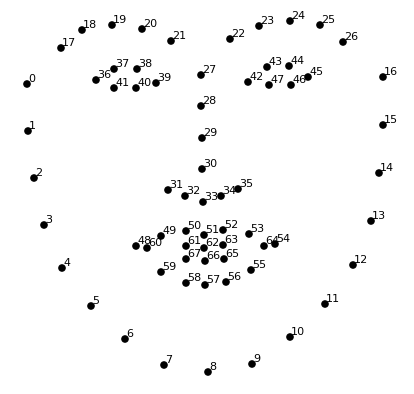

In [15]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코 위치30 
    x = landmark[30][0]  # 30번 랜드마크(코 중심)의 x 좌표
    y = landmark[30][1] # 30번 랜드마크(코 중심)의 ㅛ 좌표 - 얼굴 영역의 세로를 차지하는 픽셀의 수//2 → (437, 182-(186+1//2))
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 (531-345+1) → max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(371, 168)
(x,y) : (371,168)
(w,h) : (268,268)


- 얼굴 이미지에서는 코의 중심점이 (371, 168),  
  30번 랜드마크(코 중심)의 좌표 (x,y) : (371,34), 
  얼굴 영역 사각형의 너비와 높이 좌표 (w,h) : (268,268)



- 준비해 둔 스티커 이미지를 읽어서 적용.

In [16]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png' 
img_sticker = cv2.imread(sticker_path) # cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(268) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape) # 사이즈를 조정한  스틱커 차원 확인

(268, 268, 3)


- 스틱커 이미지를 읽고 윗 단계에서 계산한 크기로 resize.


- 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다. 이미지 시작점은 top-left 좌표이기 때문.

In [17]:
refined_x = x - w // 2 
refined_y = y - h // 2  

print (f'(x,y) : ({refined_x},{refined_y})') 

(x,y) : (237,34)


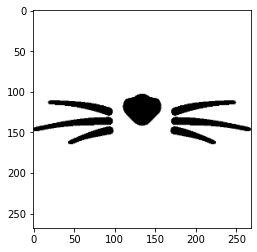

In [18]:
plt.imshow(img_sticker)
plt.show()

 ### Step 4. 스티커 적용하기

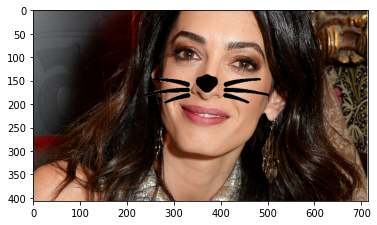

In [20]:
sticker_area = img_show[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8) # img_sticker==255은 수염의 배경 휜색을 지운다

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()

### Step 5. 문제점 찾아보기

(1) 셀프 카메라를 다양한 각도에서 촬영하면서 스티커를 반복해서 적용해 보세요.

(2) 문제점이 무엇인지 최대한 자세하게 기록해 보세요. 여러분이 생각한 문제점을 해결하기 위한 방법은 분명 존재합니다!

오늘 만든 스티커앱에서 생각해볼 수 있는 문제점은 다음과 같습니다.

얼굴 각도에 따라 스티커가 어떻게 변해야할까요?
멀리서 촬영하면 왜 안될까요? 옆으로 누워서 촬영하면 왜 안될까요?
실행 속도가 중요할까요?
스티커앱을 만들 때 정확도가 얼마나 중요할까요?

#### 1) 원거리 얼굴에 스틱카 부착

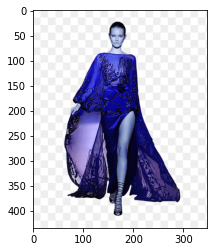

In [35]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/서있.png' 
img_bgr = cv2.imread(my_image_path)    
img_show = img_bgr.copy()      
plt.imshow(img_bgr) 
plt.show() 

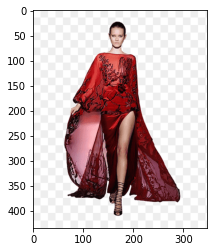

In [36]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) 
plt.show() 

In [37]:
detector_hog = dlib.get_frontal_face_detector() 
print("쓩")

쓩


In [38]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("쓩")

쓩


rectangles[[(149, 42) (185, 78)]]


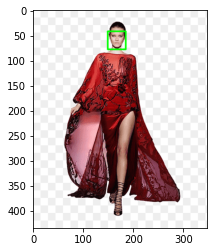

In [39]:
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_bgr, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림Q  시작점, 종료점 어디?

img_show_rgb =  cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [40]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
   
landmark_predictor = dlib.shape_predictor(model_path)
   
print("쓩") 

쓩


In [41]:
list_landmarks = []
    
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
       
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        
    list_landmarks.append(list_points)
        

print(len(list_landmarks[0]))
    
print(list_landmarks)

68
[[(154, 50), (154, 54), (155, 58), (155, 61), (156, 65), (158, 68), (160, 71), (163, 73), (167, 74), (171, 73), (174, 72), (176, 69), (178, 66), (180, 63), (181, 59), (181, 55), (182, 52), (156, 48), (158, 47), (161, 48), (163, 48), (165, 49), (171, 49), (173, 48), (175, 48), (178, 49), (179, 50), (168, 52), (168, 55), (168, 57), (167, 59), (165, 61), (166, 61), (167, 62), (169, 61), (170, 61), (159, 51), (160, 51), (163, 51), (164, 52), (162, 53), (160, 53), (171, 52), (173, 51), (175, 51), (177, 52), (175, 53), (173, 53), (163, 65), (164, 64), (166, 63), (167, 64), (169, 63), (170, 64), (172, 66), (170, 67), (169, 67), (167, 67), (166, 67), (164, 66), (163, 65), (166, 65), (167, 65), (169, 65), (171, 66), (169, 65), (167, 65), (166, 65)]]


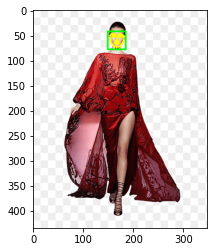

In [42]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_bgr, point, 2, (0, 255, 255), -1)
            

img_show_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    
plt.imshow(img_show_rgb)
    
plt.show() 

In [43]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코 위치30 
    x = landmark[30][0]  
    y = landmark[30][1] 
    w = h = dlib_rect.width() 
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(167, 59)
(x,y) : (167,59)
(w,h) : (37,37)


In [44]:
refined_x = x - w // 2 
refined_y = y - h // 2  

print (f'(x,y) : ({refined_x},{refined_y})') 

(x,y) : (149,41)


In [45]:
sticker_area = img_show[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)) 
plt.show()

ValueError: operands could not be broadcast together with shapes (268,268,3) (268,199,3) (268,268,3) 

#### 2) 어두운 조명에서 얼굴에 스틱카 부착

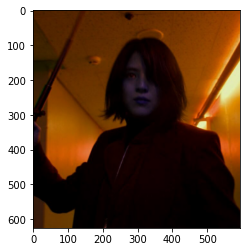

In [60]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/어둡화면.png' 
img_bgr = cv2.imread(my_image_path)    
img_show = img_bgr.copy() 

plt.imshow(img_bgr) 
plt.show() 

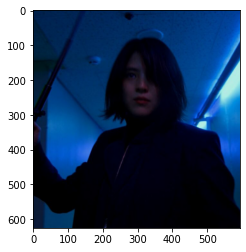

In [48]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) 
plt.show() 

- 붉은색은 푸른색으로, 푸른색은 붉은색으로 바뀌어 출력되는 BGR(파랑, 녹색, 빨강)보다  RGB 이미지가 오히려 더 파란색을 띔


In [49]:
detector_hog = dlib.get_frontal_face_detector() 
print("쓩")

쓩


In [50]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("쓩")

쓩


rectangles[[(236, 150) (390, 305)]]


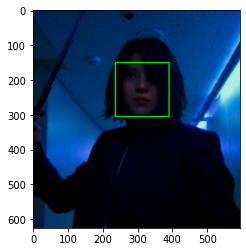

In [51]:
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_bgr, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림Q  시작점, 종료점 어디?

img_show_rgb =  cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [52]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
   
landmark_predictor = dlib.shape_predictor(model_path)
   
print("쓩") 

쓩


In [53]:
list_landmarks = []
    
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
       
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        
    list_landmarks.append(list_points)
        

print(len(list_landmarks[0]))
    
print(list_landmarks)

68
[[(247, 203), (247, 219), (248, 235), (251, 251), (257, 267), (266, 281), (277, 293), (292, 302), (308, 306), (324, 305), (339, 298), (352, 288), (361, 275), (368, 260), (372, 243), (374, 227), (375, 210), (261, 174), (270, 167), (282, 165), (293, 166), (303, 171), (323, 172), (333, 169), (345, 169), (355, 174), (362, 183), (313, 188), (313, 198), (313, 208), (313, 219), (298, 231), (305, 234), (312, 236), (318, 235), (325, 233), (272, 191), (279, 186), (288, 187), (295, 193), (287, 194), (279, 194), (329, 196), (337, 192), (345, 193), (352, 199), (344, 201), (336, 199), (287, 258), (296, 251), (305, 247), (311, 250), (317, 248), (326, 253), (334, 263), (325, 269), (316, 271), (309, 271), (303, 269), (295, 266), (291, 258), (304, 256), (310, 257), (316, 257), (330, 262), (316, 259), (310, 259), (304, 258)]]


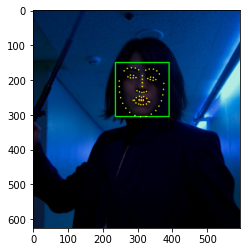

In [54]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_bgr, point, 2, (0, 255, 255), -1)
            

img_show_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    
plt.imshow(img_show_rgb)
    
plt.show() 

In [58]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코 위치30 
    x = landmark[30][0]  
    y = landmark[30][1] 
    w = h = dlib_rect.width() 
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(313, 219)
(x,y) : (313,219)
(w,h) : (155,155)


In [59]:
refined_x = x - w // 2 
refined_y = y - h // 2  

print (f'(x,y) : ({refined_x},{refined_y})') 

(x,y) : (236,142)


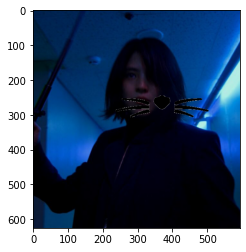

In [57]:
sticker_area = img_show[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)) 
plt.show()

- 어두운 이미지는 landmarkdhk detection도  잘 됐는데  스틱커 위치 안맞고 크기도 적절치 못함

#### 3) 누워있는  얼굴에 스틱카 부착

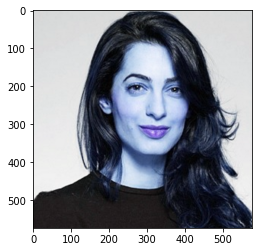

In [61]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/눕.png' 
img_bgr = cv2.imread(my_image_path)    
img_show = img_bgr.copy() 

plt.imshow(img_bgr) 
plt.show() 

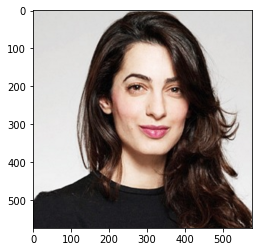

In [62]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) 
plt.show() 

- 누워있는 사람 이미지가 PNG화일로 구하기가 어려웠고 시간만 엄청 소모하고 결국 못구해 코드로 90도 회전시키기로 함. 

(289.0, 287.0)


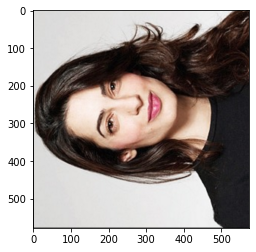

In [64]:
width, height = img_rgb.shape[:2]
cp = (img_rgb.shape[1] / 2, img_rgb.shape[0] / 2) #회전 중심축 좌표 설정
print(cp)

img_rot = cv2.getRotationMatrix2D(cp, 90, 1) 
img_rot_dst = cv2.warpAffine(img_rgb,img_rot,(width,height))

plt.imshow(img_rot_dst) 
plt.show() 

In [69]:
img_bgr= img_rot_dst.copy()
img_show = img_rot_dst.copy()

In [70]:
detector_hog = dlib.get_frontal_face_detector() 
print("쓩")

쓩


In [73]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 4)   # (image, num of image pyramid)
print("쓩")

쓩


rectangles[]


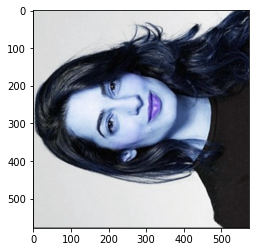

In [74]:
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_bgr, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림Q  시작점, 종료점 어디?

img_show_rgb =  cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

- 이미지가 누워있을때 image pyramid를 4까지 늘려도 detection 안되 얼굴 인식을 못함.

### Reference

- https://opencv-python.readthedocs.io/en/latest/doc/01.imageStart/imageStart.html opencv ;Image Pyramids


- http://dlib.net/python/index.html#dlib.rectangles dlib공홈; class, function, API 등등


- https://www.tugraz.at/institute/icg/research/team-bischof/lrs/downloads/aflw/ Annotated Facial Landmarks in the Wild (AFLW)


 
- https://qlsenddl-lab.tistory.com/35  절대경로 안넣고 상대경로로 해결하는법 


- https://deep-learning-study.tistory.com/105 cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) 

### 결론 및 회고

- 상태경로, 절대경로 앞으로도 계속 나올것 같아 최대한 정리는 해두었다. 경로설정에 여러시도를 하다보고 시행착오들로 시간 소모는 많았다. 프젝 제출시간 있어 이후부터 속도를 내기로 했음. 


- 어두운 이미지는 landmark와 detection도  잘 됐는데  스틱커 위치 안맞고 크기도 적절치 못한데 뭘 바꿔야할지 아쉽게도 충분한 시도를 하지 못했다.


- 푸른색이 강한 이미지는  붉은색은 푸른색으로, 푸른색은 붉은색으로 바뀌어 출력되는 BGR는 오히려 붉은색을 띈다



- 90도로 이미지가 누워있을때 image pyramid를 4까지 늘려도 detection 안되 얼굴 인식을 못한다 .


[ 해결못한 의문점들 ]


- https://qlsenddl-lab.tistory.com/35 절대경로 안넣고 상대경로로 해결하는법 



- 노드 2-3에서 weight file을 다운로드 받고 해당 모델파일은 bz2 압축파일 형태로 제공되어 압축을 풀어준 후 사용하겠다고 했으나  이건 왜 클라우드 쉘에 복붙했더니 노드는 실행 잘되는데 쥬피터는 안되 검색 하다 결국 포기. 그냥 !붙여 코드로 치는거라고 함.  bz2 압축풀필요도 없고. 어떤건   클라우드 쉘에 복붙하고 이건 쥬피토에 그냥 옮기는지 구별이 안됨.



- 원거리 얼굴에 스틱커 붙이는 시도는 ValueError가 났는데 (268,268,3) (268,199,3) (268,268,3) 에 문제인거 같은데 여러시도를 했으니 해결못함.
